<a href="https://colab.research.google.com/github/jsalinas1501/upc_data-mining/blob/master/S3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Modelos de regresión

url = 'https://raw.githubusercontent.com/aladelca/machine_learning_model/main/archivos_trabajo/crimen.txt'

data = pd.read_csv(url, sep = '\t')
data.head()

,M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time,Crime
0,15.1,1,9.1,5.8,5.6,0.510,95.0,33,30.1,0.108,4.1,3940,26.1,0.084602,26.2011,791
1,14.3,0,11.3,10.3,9.5,0.583,101.2,13,10.2,0.096,3.6,5570,19.4,0.029599,25.2999,1635
2,14.2,1,8.9,4.5,4.4,0.533,96.9,18,21.9,0.094,3.3,3180,25.0,0.083401,24.3006,578
3,13.6,0,12.1,14.9,14.1,0.577,99.4,157,8.0,0.102,3.9,6730,16.7,0.015801,29.9012,1969
4,14.1,0,12.1,10.9,10.1,0.591,98.5,18,3.0,0.091,2.0,5780,17.4,0.041399,21.2998,1234


<Axes: xlabel='Po2', ylabel='Crime'>

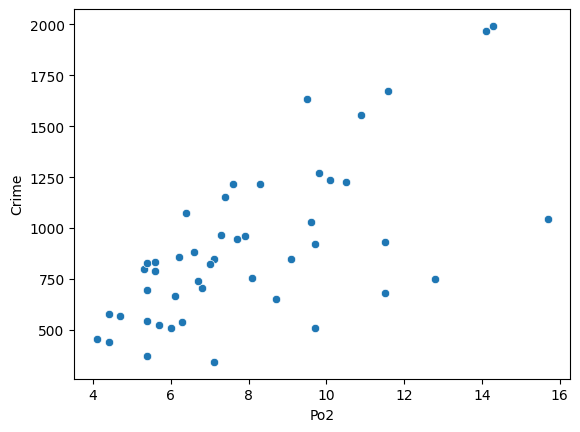

In [ ]:
sns.scatterplot(x = 'Po2', y = 'Crime', data = data)

In [ ]:
!pip install gurobipy
import gurobipy as gp
from gurobipy import GRB

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 71.1 MB/s eta 0:00:00


In [ ]:
modelo = gp.Model('Regresión Lineal Simple')

### Variables de decisión

m = modelo.addVar(1, vtype = GRB.CONTINUOUS, name = 'Pendiente')
b = modelo.addVar(1, vtype = GRB.CONTINUOUS, name = 'Intercepto')

### Función objetivo

n = data.shape[0]

modelo.setObjective(sum((data.loc[i,'Crime'] - (m*data.loc[i,'Po2'] + b) )**2 for i in range(n)), GRB.MINIMIZE)

modelo.optimize()

Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (linux64)

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 0 rows, 2 columns and 0 nonzeros
Model fingerprint: 0xab6ffdeb
Model has 3 quadratic objective terms
Coefficient statistics:
  Matrix range     [0e+00, 0e+00]
  Objective range  [9e+04, 7e+05]
  QObjective range [9e+01, 7e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [0e+00, 0e+00]
Presolve time: 0.04s
Presolved: 0 rows, 2 columns, 0 nonzeros
Presolved model has 3 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 1
 AA' NZ     : 0.000e+00
 Factor NZ  : 1.000e+00
 Factor Ops : 1.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0  -7.24522437e+08  4.50686565e+07  1.03e+03 5.85e

In [ ]:
for i in modelo.getVars():
  print(i.VarName,i.x)

Pendiente 92.22031463715952
Intercepto 165.16424149632175


<Axes: xlabel='Po2', ylabel='Crime'>

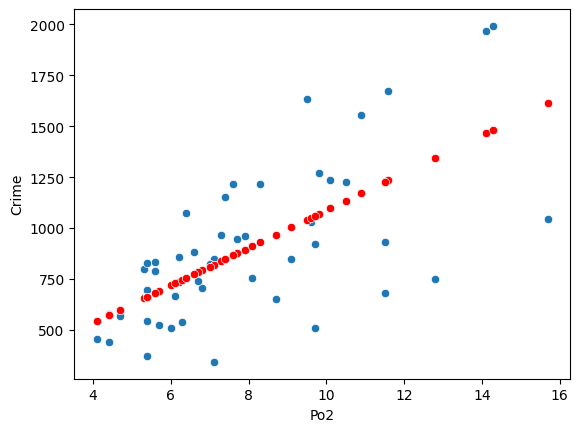

In [ ]:
sns.scatterplot(x = 'Po2', y = 'Crime', data = data)
sns.scatterplot(x = 'Po2', y = 92.22031463715952*data['Po2'] + 165.16424149632175, data = data, color = 'red')

In [ ]:
#### Para los que no programan

from sklearn.linear_model import LinearRegression

modelo_rl = LinearRegression()
modelo_rl.fit(data[['Po2']], data[['Crime']])

print('Coeficiente',modelo_rl.coef_)
print('Intercepto',modelo_rl.intercept_)

Coeficiente [[92.22031464]]
Intercepto [165.1642415]


In [ ]:
### Interpretación

print(modelo_rl.predict(np.array([[7.5]])))
print(modelo_rl.predict(np.array([[8.5]])))

[[856.81660128]]
[[949.03691591]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
#### Regresión lineal múltiple
columns = ['M', 'So', 'Ed', 'Po1', 'Po2', 'LF', 'M.F', 'Pop', 'NW', 'U1', 'U2','Wealth', 'Ineq', 'Prob', 'Time']
x = data[['M', 'So', 'Ed', 'Po1', 'Po2', 'LF', 'M.F', 'Pop', 'NW', 'U1', 'U2','Wealth', 'Ineq', 'Prob', 'Time']]
y = data[['Crime']]

modelo_rlm = LinearRegression()
modelo_rlm.fit(x, y)

for i in range(len(modelo_rlm.coef_[0])):
  print(columns[i],':',modelo_rlm.coef_[0][i])

M : 87.83017324304942
So : -3.8034502961156167
Ed : 188.3243147504193
Po1 : 192.80433827659022
Po2 : -109.42192538163255
LF : -663.8261450797675
M.F : 17.406855527635074
Pop : -0.7330081495848901
NW : 4.204461001941441
U1 : -5827.102724404788
U2 : 167.79967222183666
Wealth : 0.09616624300486798
Ineq : 70.67209945223043
Prob : -4855.265815475457
Time : -3.4790178434332577


In [ ]:
from sklearn.metrics import r2_score

preds = modelo_rlm.predict(data[columns])
print('R2:',r2_score(y,preds))
print('R2 ajustado:',1 - (1-modelo_rlm.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1))

R2: 0.8030867583169085
R2 ajustado: 0.7078061575025093


In [ ]:
#### Estandarización


datita = np.array([10,30,65,40,70,100,40])
promedio = np.mean(datita)
std = np.std(datita)

nueva_datita = (datita-promedio)/std

print(np.mean(nueva_datita))
print(np.std(nueva_datita))


-3.9650822308041306e-17
1.0


In [ ]:
from sklearn.preprocessing import StandardScaler

esc = StandardScaler()

x_est = esc.fit_transform(x)


In [ ]:
### Regularización Lasso

from sklearn.linear_model import Lasso

modelo_lasso = Lasso(alpha = 0.00001)
modelo_lasso.fit(x_est,y)

for i in range(len(modelo_lasso.coef_)):
  print(columns[i],':', modelo_lasso.coef_[i])


preds_lasso = modelo_lasso.predict(x_est)

r2_lasso = r2_score(y, preds_lasso)
print('R2:',r2_lasso)
print('R2 ajustado:',1 - (1-modelo_lasso.score(x_est, y))*(len(y)-1)/(len(y)-x.shape[1]-1))

M : 109.20128573361727
So : -1.8018954054169853
Ed : 208.4239544946657
Po1 : 566.8400179169644
Po2 : -302.6589576694534
LF : -26.53826482740579
M.F : 50.74530732388072
Pop : -27.60781003495333
NW : 42.77035153572623
U1 : -103.93163922211802
U2 : 140.19898385891707
Wealth : 91.79942579503728
Ineq : 278.93860554356417
Prob : -109.21228754472475
Time : -24.39038238438579
R2: 0.8030867582718765
R2 ajustado: 0.7078061574356876


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.220e+05, tolerance: 6.881e+02
  model = cd_fast.enet_coordinate_descent(


In [ ]:
### Regularización Ridge

from sklearn.linear_model import Ridge

modelo_ridge= Ridge(alpha = 0.001)
modelo_ridge.fit(x_est,y)


for i in range(len(modelo_ridge.coef_[0])):
  print(columns[i],':', modelo_ridge.coef_[0][i])


preds_ridge = modelo_ridge.predict(x_est)

r2_ridge = r2_score(y, preds_ridge)
print('R2:',r2_ridge)
print('R2 ajustado:',1 - (1-modelo_ridge.score(x_est, y))*(len(y)-1)/(len(y)-x.shape[1]-1))

M : 109.20390555196235
So : -1.751823682172647
Ed : 208.31305478052622
Po1 : 564.9189392431209
Po2 : -300.6518701670161
LF : -26.427581908371277
M.F : 50.7776228944435
Pop : -27.59740947771227
NW : 42.66651136282244
U1 : -103.87867933693238
U2 : 140.19670569375546
Wealth : 91.75467343845243
Ineq : 278.9211836662213
Prob : -109.13252469944223
Time : -24.282489469844663
R2: 0.803086501539461
R2 ajustado: 0.70780577647791


0.9340231401258365


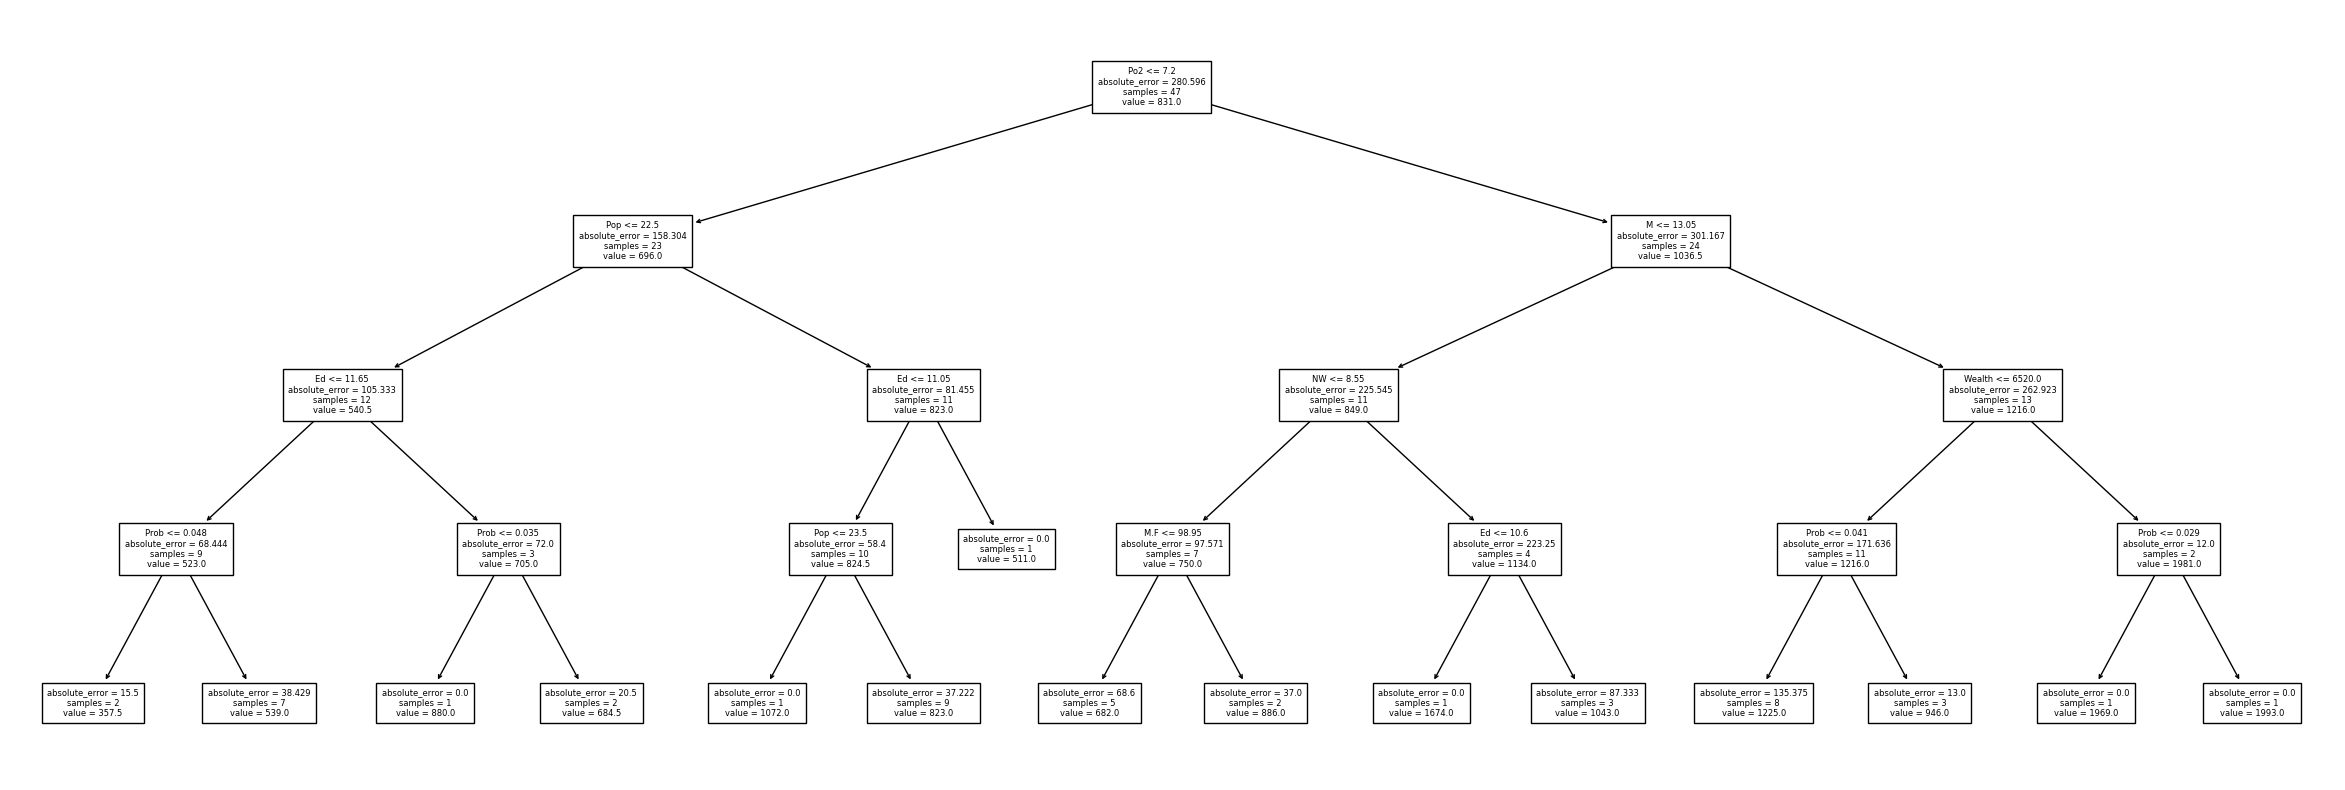

In [ ]:
#### Arboles de decisión

from sklearn.tree import DecisionTreeRegressor, plot_tree

modelo_arbol = DecisionTreeRegressor(criterion = 'absolute_error', max_depth =4)
modelo_arbol.fit(x, y)
preds_arbol = modelo_arbol.predict(x)
r2_score_arbol = r2_score(y, preds_arbol)
print(r2_score_arbol)
preds_arbol = modelo_arbol.predict(x)
plt.figure(figsize = (30,10))
plot_tree(modelo_arbol, fontsize = 6, feature_names = columns)
plt.show()